In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis, probplot
from scipy.stats import chi2_contingency
import scipy.stats as stats



In [109]:
pd.set_option('display.max_columns', None)

In [110]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### PART 1
Create a crosstab between the product category and the isBestSeller status.

In [111]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [112]:
#calculate the percentage of best sellers in each category 
#crosstab.sum(axis=1):calculates the sum of each row in the crosstab
#div(crosstab.sum(axis=1), axis=0):divides the crosstab by the sum of each row, 
#axis=0 indicates that the division should be done along the rows
crosstab_normalised = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_sorted = crosstab_normalised.sort_values(by=True, ascending=False)
crosstab_sorted

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
"CD, Disc & Tape Players",1.000000,0.000000
General Music-Making Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000


In [113]:
crosstab_top = crosstab_sorted.head(20)
crosstab_top

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
"Billiard, Snooker & Pool",0.967871,0.032129
Pet Supplies,0.969800,0.030200
Home Brewing & Wine Making,0.971545,0.028455
Wind Instruments,0.972000,0.028000


In [114]:
proportion_bestsellers = df.groupby('category')['isBestSeller'].mean().sort_values(ascending=False).head(10)
proportion_bestsellers

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Billiard, Snooker & Pool          0.032129
Pet Supplies                      0.030200
Home Brewing & Wine Making        0.028455
Wind Instruments                  0.028000
Mirrors                           0.028000
Name: isBestSeller, dtype: float64

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [115]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f'Chi-square statistic: {chi2}') #A measure of the difference between the observed and expected frequencies.
print(f'p-value: {p}')# A low p-value (typically < 0.05) indicates that you can reject the null hypothesis, 
#suggesting that there is a significant association between the product category and the best-seller status.
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-square statistic: 36540.20270061387
p-value: 0.0
Degrees of freedom: 295
Expected frequencies:
[[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 8.13135755e-01]
 [9.465986

High p-value - there is no significant evidence to suggest that the distribution of best-sellers is dependent on the product category.
Relatively low Chi-square statistic further supports the conclusion that there is no significant association between the product category and the best-seller status.
The high degrees of freedom may suggest that your data has many categories.


In [116]:
# Calculate the total number of observations
n = crosstab.sum().sum()

# Calculate Cramér's V
r, k = crosstab.shape # r = number of rows, k = number of columns
cramers_v = np.sqrt(chi2 / (n * (min(k-1, r-1)))) # min(k-1, r-1) is used to avoid division by zero when k=1 or r=1

print(f'Cramér\'s V: {cramers_v}')

Cramér's V: 0.1222829439760564


Cramér's V value of 0.115 (approximately) falls into the range indicating a very weak association.

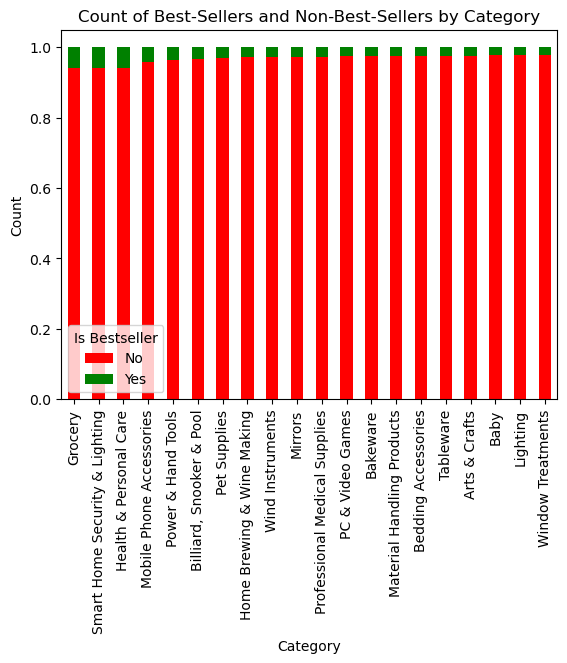

In [117]:
# Plot the crosstab as a stacked bar chart
crosstab_top.plot(kind='bar', stacked=True, color=['red', 'green'])

# Add titles and labels
plt.title('Count of Best-Sellers and Non-Best-Sellers by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Is Bestseller', labels=['No', 'Yes'])

# Display the plot
plt.show()


### Part 2

In [118]:
#calculate outliers in the price column
# Calculate interquartile range (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
IQR

36.0

In [119]:
# Calculate lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [120]:
# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
10,11,B08VDNCZT9,JBL Charge 5 - Portable Bluetooth Speaker with...,4.8,11920,139.00,False,0,Hi-Fi Speakers
19,20,B07NQCKJSH,Echo Studio | Our best-sounding Wi-Fi and Blue...,4.5,14222,164.99,False,0,Hi-Fi Speakers
25,26,B0BLS36M5R,All-new Echo Show 8 | 3rd generation (2023 rel...,0.0,0,149.99,False,0,Hi-Fi Speakers
28,29,B096G3R7C3,JBL PartyBox110 Portable Indoor and Outdoor Pa...,4.8,153,289.00,False,0,Hi-Fi Speakers
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
2443627,2828568,B005QN452A,Racer Beasty Ladies Leather Motorbike Trousers,3.8,181,152.58,False,0,Motorbike Clothing
2443638,2828579,B084R261ML,"SHIMA EXO Vented, Motorbike Shoes for Women | ...",4.6,209,108.77,False,0,Motorbike Clothing
2443641,2828582,B07JM93SCC,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing


In [121]:
#remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [122]:
top_categories = df_no_outliers['category'].value_counts().nlargest(20).index
df_top_categories = df_no_outliers[df_no_outliers['category'].isin(top_categories)]
df_top_categories

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [123]:
# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_categories)

# Add titles and labels
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=90, fontsize=10)

# Display the plot
plt.show()

In [ ]:
median_prices = df_no_outliers.groupby('category')['price'].median()
median_prices

category
3D Printers                       52.195
3D Printing & Scanning            28.580
Abrasive & Finishing Products     10.150
Action Cameras                    33.135
Adapters                           7.050
                                   ...  
Wind Instruments                  13.470
Window Treatments                 17.990
Women                             15.990
Women's Sports & Outdoor Shoes    45.990
eBook Readers & Accessories       21.990
Name: price, Length: 296, dtype: float64

In [ ]:
top_categories_2 = df_no_outliers['category'].value_counts().nlargest(10).index
df_top_categories_2 = df_no_outliers[df_no_outliers['category'].isin(top_categories_2)]
df_top_categories_2

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


/var/folders/vp/y35h7cns1893095_3t9y959w0000gn/T/ipykernel_68479/4278029752.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='price', data=df_top_categories_2, estimator=np.mean, ci=None)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

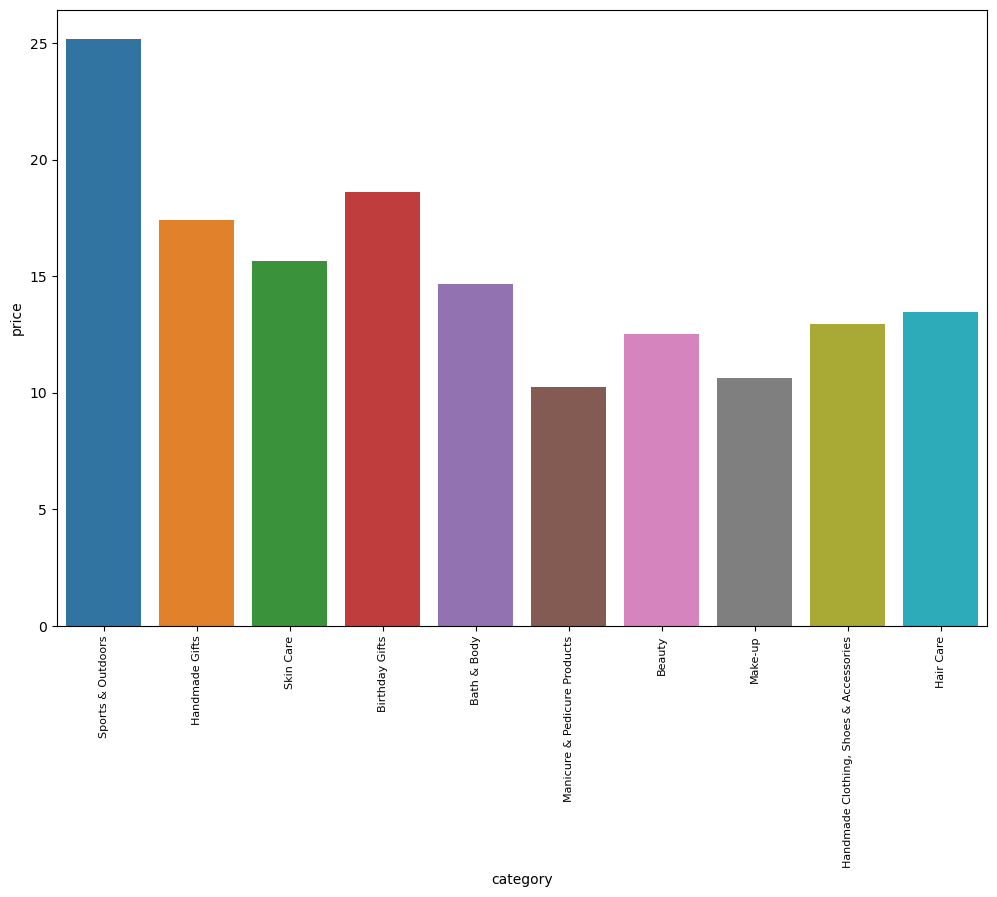

In [ ]:
#bar chart of median prices

plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='price', data=df_top_categories_2, estimator=np.mean, ci=None)
#change font size of x-axis labels and rotate them
plt.xticks(fontsize=8, rotation=90)


In [ ]:
mean_prices = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)
mean_prices

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

In [ ]:
df_top_categories_2

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


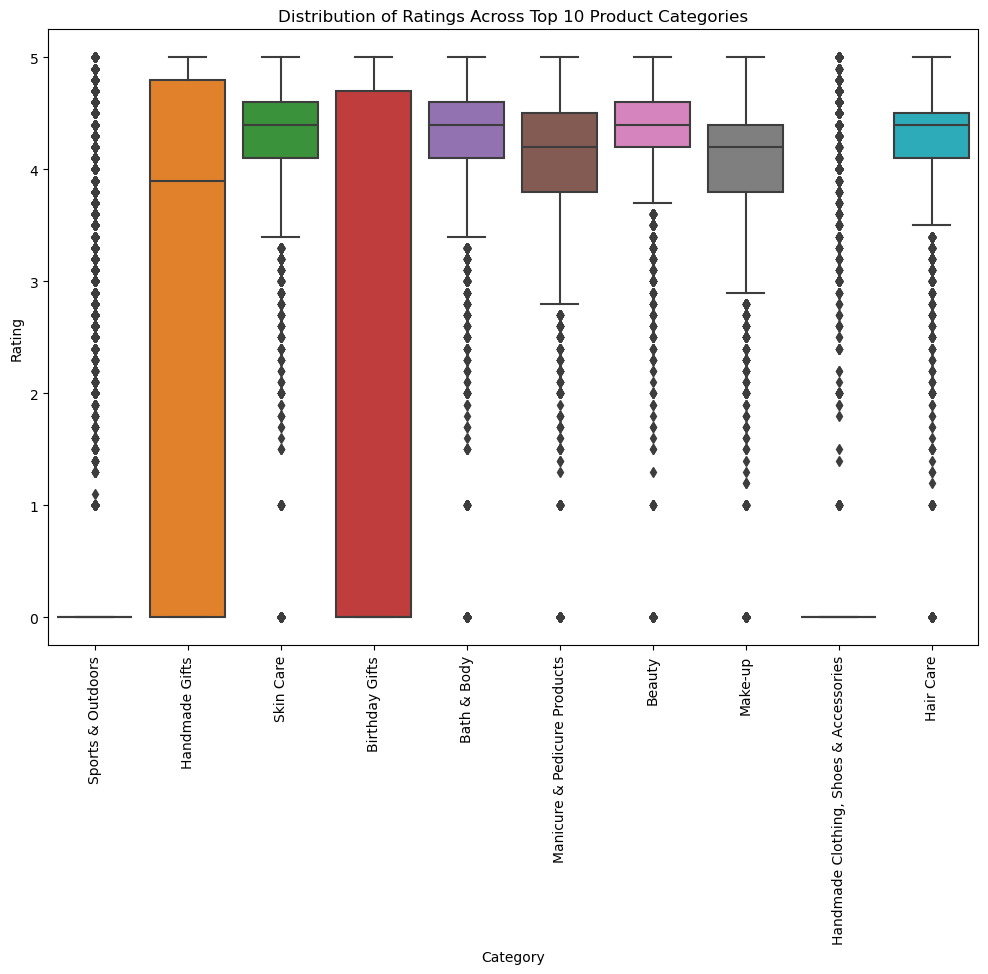

In [ ]:
# Create a boxplot for the 'price' column by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_categories_2)

# Add titles and labels
plt.title('Distribution of Ratings Across Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90, fontsize=10)

# Display the plot
plt.show()

In [ ]:
median_ratings = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
median_ratings

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
                               ... 
Hockey Shoes                    0.0
Hi-Fi Receivers & Separates     0.0
Handmade Kitchen & Dining       0.0
Handmade Jewellery              0.0
eBook Readers & Accessories     0.0
Name: stars, Length: 296, dtype: float64

### Part 3

In [ ]:
correlation = df['price'].corr(df['stars'])
correlation

-0.1249067326214869

In [ ]:
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
correlation

-0.07767299878181352


r is less than 0, it indicates a negative linear relationship between the variables. As one variable increases, the other variable tends to decrease.

The absolute value of the correlation coefficient is approximately 0.125, which falls into the range of weak correlation (0 < |r| < 0.3).

This means that the relationship between the two variables is weak and the variables are not strongly linearly related.


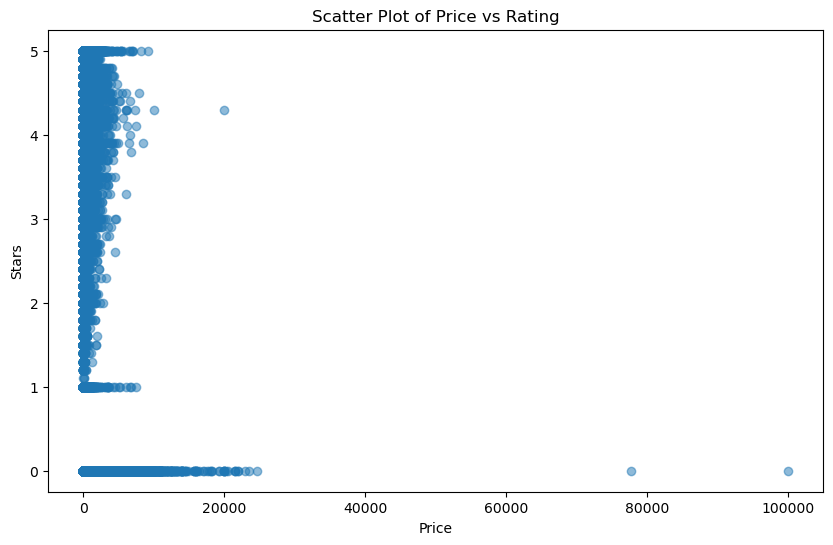

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['stars'], alpha=0.5)

# Add titles and labels
plt.title('Scatter Plot of Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Stars')

# Display the plot
plt.show()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


In [ ]:
df_numeric.drop(columns=['uid'], inplace=True)


In [ ]:
df_numeric

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0
...,...,...,...,...
2443646,0.0,0,22.34,0
2443647,0.0,0,97.99,0
2443648,0.0,0,52.99,0
2443649,4.3,404,79.99,0


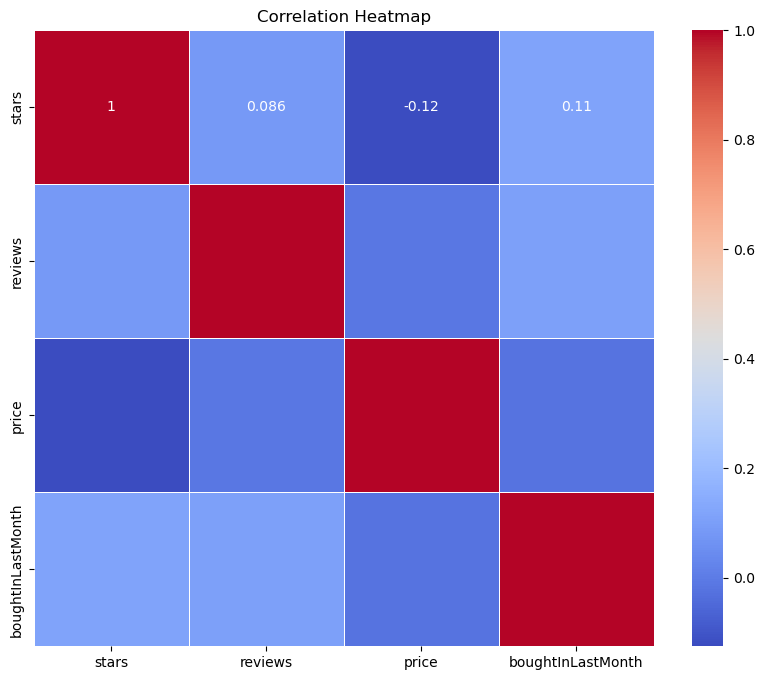

In [ ]:
corr_matrix = df_numeric.corr()
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap')
plt.show()

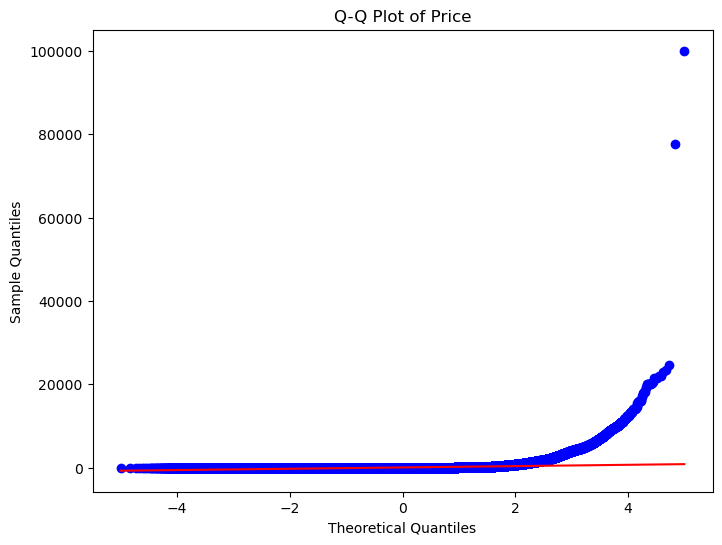

In [ ]:
# Create the Q-Q plot for the 'Price' column
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)

# Add titles and labels
plt.title('Q-Q Plot of Price')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Display the plot
plt.show()

Systematic deviations from the line (e.g., a curve) indicate departures from normality.
Points that deviate significantly from the line suggest outliers.